# Fallstudie RKI Corona Daten

## Daten einlesen

In [2]:
import pandas as pd

link="https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv"
RKI_komplett = pd.read_csv(link)

In [3]:
RKI_komplett.tail()

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
1786799,1786800,16,Thüringen,LK Altenburger Land,A80+,W,5,0,2021/04/21 00:00:00+00,16077,"28.04.2021, 00:00 Uhr",0,-9,2021/04/21 00:00:00+00,-9,0,0,Nicht übermittelt
1786800,1786801,16,Thüringen,LK Altenburger Land,A80+,W,2,0,2021/04/22 00:00:00+00,16077,"28.04.2021, 00:00 Uhr",0,-9,2021/04/22 00:00:00+00,-9,0,0,Nicht übermittelt
1786801,1786802,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021/04/23 00:00:00+00,16077,"28.04.2021, 00:00 Uhr",0,-9,2021/04/23 00:00:00+00,-9,0,0,Nicht übermittelt
1786802,1786803,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021/04/26 00:00:00+00,16077,"28.04.2021, 00:00 Uhr",0,-9,2021/04/26 00:00:00+00,-9,0,0,Nicht übermittelt
1786803,1786804,16,Thüringen,LK Altenburger Land,unbekannt,W,1,0,2021/04/06 00:00:00+00,16077,"28.04.2021, 00:00 Uhr",0,-9,2021/04/06 00:00:00+00,-9,0,0,Nicht übermittelt


## Fälle für Gesamtdeutschland bestimmen

In [4]:
RKI_Deutschland = RKI_komplett.groupby(['Meldedatum']).agg({'AnzahlFall': ['sum']}).reset_index()
RKI_Deutschland['Meldedatum'] = pd.to_datetime(RKI_Deutschland['Meldedatum'],format='%Y/%m/%d')
RKI_Deutschland.columns = ['Meldedatum','Neue Fallzahlen']
RKI_Deutschland["Neue Fallzahlen"] = RKI_Deutschland["Neue Fallzahlen"].astype(int)
RKI_Deutschland["Neue Fallzahlen Mittelwert (7 Tage)"] = RKI_Deutschland["Neue Fallzahlen"].rolling(7).mean().fillna(0)
RKI_Deutschland["Neue Fallzahlen Mittelwert (7 Tage)"] = RKI_Deutschland["Neue Fallzahlen Mittelwert (7 Tage)"].astype(int)
RKI_Deutschland["Faelle gesamt"] = RKI_Deutschland["Neue Fallzahlen"].cumsum(axis = 0) 
RKI_Deutschland.to_csv("RKI_Corona_Deutschland.csv", index=False)

In [5]:
RKI_Deutschland.tail()

,Meldedatum,Neue Fallzahlen,Neue Fallzahlen Mittelwert (7 Tage),Faelle gesamt
441,2021-04-23 00:00:00+00:00,22873,20670,3276582
442,2021-04-24 00:00:00+00:00,17820,20687,3294402
443,2021-04-25 00:00:00+00:00,8597,20652,3302999
444,2021-04-26 00:00:00+00:00,11309,20505,3314308
445,2021-04-27 00:00:00+00:00,17841,19051,3332149


## Bundesland rausfiltern

In [6]:
RKI_Bundesland = RKI_komplett.groupby(['Meldedatum','Bundesland']).agg({'AnzahlFall': ['sum']}).reset_index()
RKI_Bundesland.columns=["Meldedatum","Bundesland","Neue Fallzahlen"]
RKI_Bundesland['Meldedatum'] = pd.to_datetime(RKI_Bundesland['Meldedatum'],format='%Y/%m/%d')
RKI_Bundesland.to_csv("RKI_Corona_Bundeslaender.csv", index=False)
RKI_Bundesland

,Meldedatum,Bundesland,Neue Fallzahlen
0,2020-01-07 00:00:00+00:00,Nordrhein-Westfalen,1
1,2020-01-19 00:00:00+00:00,Berlin,1
2,2020-01-23 00:00:00+00:00,Saarland,1
3,2020-01-25 00:00:00+00:00,Nordrhein-Westfalen,1
4,2020-01-28 00:00:00+00:00,Bayern,2
...,...,...,...
6634,2021-04-27 00:00:00+00:00,Saarland,189
6635,2021-04-27 00:00:00+00:00,Sachsen,1022
6636,2021-04-27 00:00:00+00:00,Sachsen-Anhalt,479
6637,2021-04-27 00:00:00+00:00,Schleswig-Holstein,352


### 7 Tage Inizidenz

In [7]:
Bundeslaender = RKI_Bundesland["Bundesland"].unique()

li = []
for i in Bundeslaender:
    df = RKI_Bundesland.loc[RKI_Bundesland["Bundesland"] == i]
    df["Neue Fallzahlen Mittelwert (7 Tage)"] = df["Neue Fallzahlen"].rolling(7).mean().fillna(0)
    df["Neue Fallzahlen Summe (7 Tage)"] = df["Neue Fallzahlen"].rolling(7).sum().fillna(0)
    df["Neue Fallzahlen Mittelwert (7 Tage)"] = df["Neue Fallzahlen Mittelwert (7 Tage)"].astype(int)
    df["Neue Fallzahlen Summe (7 Tage)"] = df["Neue Fallzahlen Summe (7 Tage)"].astype(int)
    df["Faelle gesamt"] = df["Neue Fallzahlen"].cumsum(axis = 0) 
    
    if i == "Brandenburg":
        Einwohner=2521893
    if i == "Nordrhein-Westfalen":
        Einwohner=17947221
    if i == "Baden-Württemberg":
        Einwohner=11100394
    if i == "Saarland":
        Einwohner=986887
    if i == "Sachsen":
        Einwohner=4071971
    if i == "Bayern":
        Einwohner=13124737
    if i == "Niedersachsen":
        Einwohner=7993608
    if i == "Hessen":
        Einwohner=6288080
    if i == "Rheinland-Pfalz":
        Einwohner=4093903
    if i == "Schleswig-Holstein":
        Einwohner=2903773
    if i == "Hamburg":
        Einwohner=1847253
    if i == "Bremen":
        Einwohner=681202
    if i == "Berlin":
        Einwohner=3669491
    if i == "Mecklenburg-Vorpommern":
        Einwohner=1608138
    if i == "Thüringen":
        Einwohner=2133378
    if i == "Sachsen-Anhalt":
        Einwohner=2194782
    
    df["7 Tage Indizdenz"] = df["Neue Fallzahlen Summe (7 Tage)"]/Einwohner*100000
    df["7 Tage Indizdenz"] = df["7 Tage Indizdenz"].round(0)

    li.append(df)

# Dataframe zusammenführen
Bundeslaender_RM7 = pd.concat(li, axis=0, ignore_index=True)
Bundeslaender_RM7

<ipython-input-7-f3b23e1148f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Neue Fallzahlen Mittelwert (7 Tage)"] = df["Neue Fallzahlen"].rolling(7).mean().fillna(0)
<ipython-input-7-f3b23e1148f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Neue Fallzahlen Summe (7 Tage)"] = df["Neue Fallzahlen"].rolling(7).sum().fillna(0)
<ipython-input-7-f3b23e1148f8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Meldedatum,Bundesland,Neue Fallzahlen,Neue Fallzahlen Mittelwert (7 Tage),Neue Fallzahlen Summe (7 Tage),Faelle gesamt,7 Tage Indizdenz
0,2020-01-07 00:00:00+00:00,Nordrhein-Westfalen,1,0,0,1,0.0
1,2020-01-25 00:00:00+00:00,Nordrhein-Westfalen,1,0,0,2,0.0
2,2020-02-12 00:00:00+00:00,Nordrhein-Westfalen,1,0,0,3,0.0
3,2020-02-20 00:00:00+00:00,Nordrhein-Westfalen,2,0,0,5,0.0
4,2020-02-26 00:00:00+00:00,Nordrhein-Westfalen,3,0,0,8,0.0
...,...,...,...,...,...,...,...
6634,2021-04-23 00:00:00+00:00,Sachsen-Anhalt,646,567,3973,87195,181.0
6635,2021-04-24 00:00:00+00:00,Sachsen-Anhalt,504,577,4045,87699,184.0
6636,2021-04-25 00:00:00+00:00,Sachsen-Anhalt,332,593,4153,88031,189.0
6637,2021-04-26 00:00:00+00:00,Sachsen-Anhalt,321,589,4128,88352,188.0


### Daten aus dem letzten Tag

In [8]:
Bundeslaender_RM7_lastday=Bundeslaender_RM7.loc[Bundeslaender_RM7["Meldedatum"]==Bundeslaender_RM7["Meldedatum"].iloc[-1]].sort_values(by="7 Tage Indizdenz", ascending=False).reset_index(drop=True)
Bundeslaender_RM7_lastday

,Meldedatum,Bundesland,Neue Fallzahlen,Neue Fallzahlen Mittelwert (7 Tage),Neue Fallzahlen Summe (7 Tage),Faelle gesamt,7 Tage Indizdenz
0,2021-04-27 00:00:00+00:00,Thüringen,814,672,4709,114276,221.0
1,2021-04-27 00:00:00+00:00,Sachsen,1022,1222,8554,258148,210.0
2,2021-04-27 00:00:00+00:00,Baden-Württemberg,3230,3038,21271,435266,192.0
3,2021-04-27 00:00:00+00:00,Sachsen-Anhalt,479,560,3924,88831,179.0
4,2021-04-27 00:00:00+00:00,Nordrhein-Westfalen,4004,4563,31947,724600,178.0
5,2021-04-27 00:00:00+00:00,Hessen,1865,1573,11012,258419,175.0
6,2021-04-27 00:00:00+00:00,Bayern,2910,3047,21329,584984,163.0
7,2021-04-27 00:00:00+00:00,Bremen,160,147,1033,24804,152.0
8,2021-04-27 00:00:00+00:00,Saarland,189,196,1375,36615,139.0
9,2021-04-27 00:00:00+00:00,Mecklenburg-Vorpommern,470,319,2234,39298,139.0


### Plot mit `seaborn`

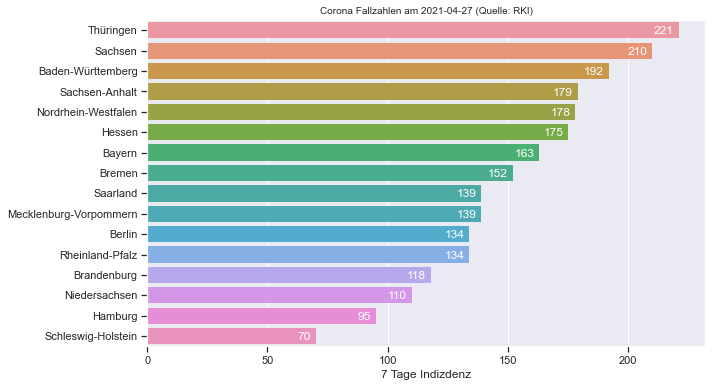

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_context("notebook")


def show_values_on_bars(axs, h_v="v", space=0.4, space2=0):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() / 2 + float(space2)
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="right", va="center", c="white")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

fig , ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(data=Bundeslaender_RM7_lastday,y="Bundesland", x="7 Tage Indizdenz")

show_values_on_bars(ax, "h", -2,0.05) # Zahlen hinzufügen

# title
last_date = Bundeslaender_RM7_lastday.iloc[-1,0].strftime('%Y-%m-%d') # letztes Datum als Datenstand
ax.set_title("Corona Fallzahlen am "+last_date+" (Quelle: RKI)", fontsize=10)

# Label
ax.set_ylabel("")

plt.savefig('Bundeslaender_RKI-Coronazahlen_Stand'+last_date+'.png', bbox_inches='tight', dpi=150)
plt.show()

## Leipzig rausfiltern

In [10]:
Leipzig = RKI_komplett.loc[RKI_komplett["Landkreis"] == "SK Leipzig"]
Leipzig = Leipzig.groupby(['Meldedatum']).agg({'AnzahlFall': ['sum']}).reset_index()
Leipzig['Meldedatum'] = pd.to_datetime(Leipzig['Meldedatum'],format='%Y/%m/%d')
Leipzig.columns = ['Meldedatum','Neue Fallzahlen']
Leipzig["Neue Fallzahlen Mittelwert (7 Tage)"] = Leipzig["Neue Fallzahlen"].rolling(7).mean().fillna(0).astype(int)
Leipzig["Neue Fallzahlen Summe (7 Tage)"] = Leipzig["Neue Fallzahlen"].rolling(7).sum().fillna(0).astype(int)
Leipzig["Faelle gesamt"] = Leipzig["Neue Fallzahlen"].cumsum(axis = 0) 
Einwohner = 605407  # Quelle: https://www.leipzig.de/news/news/leipzig-hat-jetzt-605407-einwohner/
Leipzig["7 Tage Indizdenz"] = Leipzig["Neue Fallzahlen Summe (7 Tage)"]/Einwohner*100000
Leipzig["7 Tage Indizdenz"] = Leipzig["7 Tage Indizdenz"].round(0)
Leipzig.to_csv("RKI_Corona_Leipzig.csv", index=False)
Leipzig

,Meldedatum,Neue Fallzahlen,Neue Fallzahlen Mittelwert (7 Tage),Neue Fallzahlen Summe (7 Tage),Faelle gesamt,7 Tage Indizdenz
0,2020-03-06 00:00:00+00:00,1,0,0,1,0.0
1,2020-03-08 00:00:00+00:00,1,0,0,2,0.0
2,2020-03-10 00:00:00+00:00,2,0,0,4,0.0
3,2020-03-11 00:00:00+00:00,2,0,0,6,0.0
4,2020-03-12 00:00:00+00:00,10,0,0,16,0.0
...,...,...,...,...,...,...
338,2021-04-23 00:00:00+00:00,86,102,714,19974,118.0
339,2021-04-24 00:00:00+00:00,91,105,741,20065,122.0
340,2021-04-25 00:00:00+00:00,57,107,751,20122,124.0
341,2021-04-26 00:00:00+00:00,38,105,740,20160,122.0


### plot mit `matplotlib`

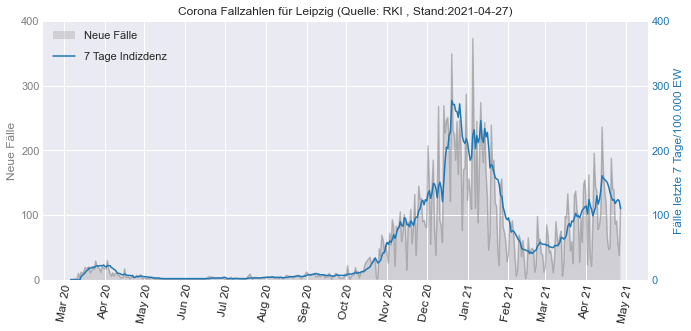

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as tkr 

# Allgemein
plt.style.use('seaborn-darkgrid') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )
plt.rcParams.update({'font.size': 20});

# Set Figure
fig , ax1 = plt.subplots(figsize=(10,5))

# Plot 1 : ax1 - neue Fälle

# Plot
ax1.plot(Leipzig["Meldedatum"],Leipzig["Neue Fallzahlen"], color='tab:gray', alpha=0.5)
ax1.fill_between(Leipzig["Meldedatum"], Leipzig["Neue Fallzahlen"], 0, facecolor ='tab:gray', alpha=0.25, zorder=-99, label="Neue Fälle") 

# Plot 2 : ax2 - Fälle kumuliert
ax2 = ax1.twinx()

# Plot
ax2.plot(Leipzig["Meldedatum"],Leipzig["7 Tage Indizdenz"], color='tab:blue',label="7 Tage Indizdenz", zorder=99)
ax2.grid()

# Legenden
ax1.legend(bbox_to_anchor=(0, 1.0), loc='upper left')
ax2.legend(bbox_to_anchor=(0, 0.92), loc='upper left')

# Zahlen der y-Achse Tausend mit Komma trennen
ax1.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))
ax2.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))

# Farben der zwei y-Achsen anpassen (mit Beschriftung)
ax1.set_ylabel('Neue Fälle', color='tab:gray')
ax2.set_ylabel("Fälle letzte 7 Tage/100.000 EW", color='tab:blue')
ax1.tick_params(colors='tab:gray', which='both', axis="y") 
ax2.tick_params(colors='tab:blue', which='both', axis="y") 

# y ticks Anpassen
ax1.set_ylim(bottom=0, top=400) # Achse 2 Limits
ax2.set_ylim(bottom=0, top=400) # Achse 1 Limits

nticks=5 # Anzahl Ticks für Achse 1 und 2
ax1.yaxis.set_major_locator(tkr.LinearLocator(nticks))
ax2.yaxis.set_major_locator(tkr.LinearLocator(nticks))

# x ticks Anpassen
ax1.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax1.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=12); # Labels drehen

# x Tick Schrift Formatierung (Variante 2: automatisch)
#fig.autofmt_xdate()

# title
last_date = Leipzig.iloc[-1,0].strftime('%Y-%m-%d') # letztes Datum als Datenstand
ax1.set_title("Corona Fallzahlen für Leipzig (Quelle: RKI , Stand:"+last_date+")", fontsize=12)

plt.tight_layout()
plt.savefig('Leipzig_RKI-Coronazahlen_Stand'+last_date+'.png', bbox_inches='tight', dpi=150)
plt.show()
